In [ ]:
################ Xenium analysis ##################

In [27]:
################ Colorectal dataset #######################

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

In [4]:
import pandas as pd
df = pd.read_csv('/scratch/leuven/353/vsc35372/Hackathon2024/datasets/colorectal_cancer/Xenium_V1_Human_Colon_Cancer_P1_CRC_Add_on_FFPE_outs/cells.csv.gz',
                 compression='gzip', header=0, sep=',', quotechar='"', on_bad_lines='skip')
df

cell_id   x_centroid   y_centroid  transcript_counts  \
0       aaaaajbn-1    25.138615  3237.204834                 53   
1       aaaaiele-1    11.556502  3250.689697                 28   
2       aaaajcgf-1    43.350491  3248.804443                 63   
3       aaaaklem-1    31.798679  3246.947266                 26   
4       aaabffln-1    59.769905  3427.839600                180   
...            ...          ...          ...                ...   
307757  oikonkkk-1  4121.417480   916.675110                 12   
307758  oikpckcl-1  4134.064453   926.111877                  9   
307759  oikpghnk-1  4123.603516   926.021301                  1   
307760  oikpjbmk-1  4073.367432  1071.865845                 29   
307761  oikpleeo-1  4077.842773   988.789734                 21   

        control_probe_counts  control_codeword_counts  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   
...                      ...                      ...   
307757                     0                        0   
307758                     0                        0   
307759                     0                        0   
307760                     0                        0   
307761                     0                        0   

        unassigned_codeword_counts  deprecated_codeword_counts  total_counts  \
0                                0                           0            53   
1                                0                           0            28   
2                                0                           0            63   
3                                0                           0            26   
4                                0                           0           180   
...                            ...                         ...           ...   
307757                           0                           0            12   
307758                           0                           0             9   
307759                           0                           0             1   
307760                           0                           0            29   
307761                           0                           0            21   

        cell_area  nucleus_area  
0       70.895315     38.744064  
1       74.056253     26.913126  
2       48.904221     20.094532  
3       54.503596     14.720938  
4       91.938128     24.339220  
...           ...           ...  
307757  96.408597      5.012344  
307758  62.722034      6.908907  
307759  11.334219     11.334219  
307760  42.175939     42.175939  
307761  39.556876     29.712814  

[307762 rows x 11 columns]

In [5]:
adata = sc.read_10x_h5(
    filename="/scratch/leuven/353/vsc35372/Hackathon2024/datasets/colorectal_cancer/Xenium_V1_Human_Colon_Cancer_P1_CRC_Add_on_FFPE_outs/cell_feature_matrix.h5"
)
df.set_index(adata.obs_names, inplace=True)
adata.obs = df.copy()
adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()
adata.obs

cell_id   x_centroid   y_centroid  transcript_counts  \
aaaaajbn-1  aaaaajbn-1    25.138615  3237.204834                 53   
aaaaiele-1  aaaaiele-1    11.556502  3250.689697                 28   
aaaajcgf-1  aaaajcgf-1    43.350491  3248.804443                 63   
aaaaklem-1  aaaaklem-1    31.798679  3246.947266                 26   
aaabffln-1  aaabffln-1    59.769905  3427.839600                180   
...                ...          ...          ...                ...   
oikonkkk-1  oikonkkk-1  4121.417480   916.675110                 12   
oikpckcl-1  oikpckcl-1  4134.064453   926.111877                  9   
oikpghnk-1  oikpghnk-1  4123.603516   926.021301                  1   
oikpjbmk-1  oikpjbmk-1  4073.367432  1071.865845                 29   
oikpleeo-1  oikpleeo-1  4077.842773   988.789734                 21   

            control_probe_counts  control_codeword_counts  \
aaaaajbn-1                     0                        0   
aaaaiele-1                     0                        0   
aaaajcgf-1                     0                        0   
aaaaklem-1                     0                        0   
aaabffln-1                     0                        0   
...                          ...                      ...   
oikonkkk-1                     0                        0   
oikpckcl-1                     0                        0   
oikpghnk-1                     0                        0   
oikpjbmk-1                     0                        0   
oikpleeo-1                     0                        0   

            unassigned_codeword_counts  deprecated_codeword_counts  \
aaaaajbn-1                           0                           0   
aaaaiele-1                           0                           0   
aaaajcgf-1                           0                           0   
aaaaklem-1                           0                           0   
aaabffln-1                           0                           0   
...                                ...                         ...   
oikonkkk-1                           0                           0   
oikpckcl-1                           0                           0   
oikpghnk-1                           0                           0   
oikpjbmk-1                           0                           0   
oikpleeo-1                           0                           0   

            total_counts  cell_area  nucleus_area  
aaaaajbn-1            53  70.895315     38.744064  
aaaaiele-1            28  74.056253     26.913126  
aaaajcgf-1            63  48.904221     20.094532  
aaaaklem-1            26  54.503596     14.720938  
aaabffln-1           180  91.938128     24.339220  
...                  ...        ...           ...  
oikonkkk-1            12  96.408597      5.012344  
oikpckcl-1             9  62.722034      6.908907  
oikpghnk-1             1  11.334219     11.334219  
oikpjbmk-1            29  42.175939     42.175939  
oikpleeo-1            21  39.556876     29.712814  

[307762 rows x 11 columns]

In [17]:
sc.pp.filter_cells(adata, min_counts=10)
sc.pp.filter_genes(adata, min_cells=5)

In [18]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/data/leuven/353/vsc35372/miniconda3/envs/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_3661611/4193936636.py:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


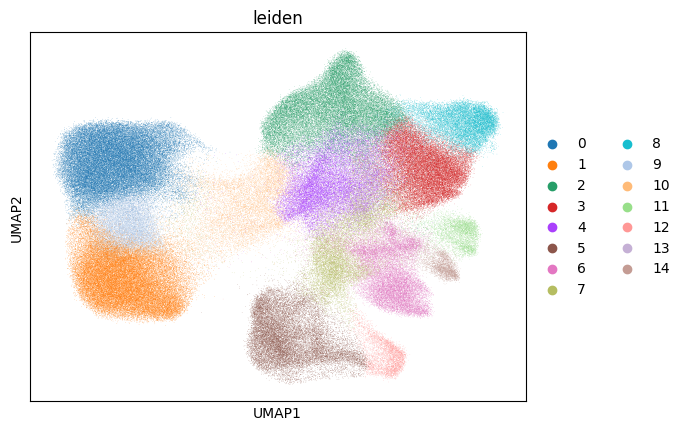

In [19]:
sc.pl.umap(
    adata,
    color=[
        "leiden",
    ],
    wspace=0.4,
)

/data/leuven/353/vsc35372/miniconda3/envs/env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


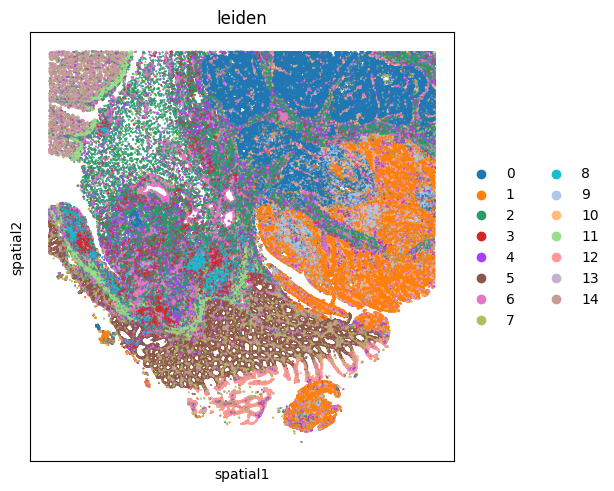

In [20]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=["leiden"],
    wspace=0.4,
)

In [8]:
##################### Feature extraction from H&E #################

In [7]:
adata

AnnData object with n_obs × n_vars = 289352 × 422
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    obsm: 'spatial'

In [2]:
import tifffile
img = tifffile.imread('/scratch/leuven/353/vsc35372/Hackathon2024/datasets/colorectal_cancer/Xenium_V1_Human_Colon_Cancer_P1_CRC_Add_on_FFPE_he_image.ome.tif')

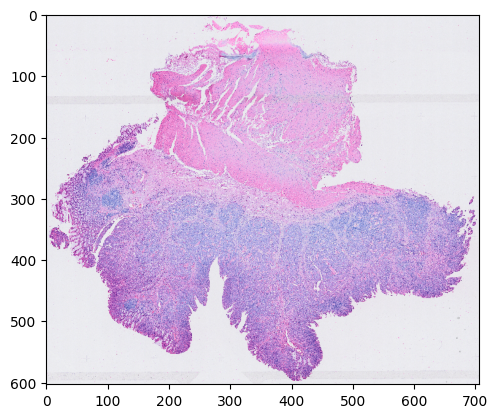

In [3]:
plt.imshow(img[::100, ::100])

In [4]:
alignment = pd.read_csv('/scratch/leuven/353/vsc35372/Hackathon2024/datasets/colorectal_cancer/Xenium_V1_Human_Colon_Cancer_P1_CRC_Add_on_FFPE_he_imagealignment.csv')
alignment

fixedX        fixedY    alignmentX    alignmentY
0  23383.483193   6796.859191  19260.335027  37971.863392
1  15029.370942   5789.722861  20010.959644  31488.865620
2  26826.352274  15247.597137  12717.793421  40682.199802
3  13259.939545  20392.699802   8668.575182  30179.918400
4   7760.180124  13886.434412  13696.977305  25884.044410
5  29812.200004   7587.003347  18670.329153  42963.443449
6  21604.576843   5759.049129  20059.456001  36590.595139
7  21555.758100  13930.659579  13717.152575  36588.585458

In [14]:
max(alignment['fixedY'])

20392.69980171625

In [70]:
[min(alignment['alignmentX']), max(alignment['alignmentX'])]

[8668.575182276618, 20059.45600067394]

In [71]:
[min(alignment['alignmentY']), max(alignment['alignmentY'])]

[25884.044410421437, 42963.4434489314]

In [3]:
img_cropped = np.rot90(img[20392: 42963, 0: 20059])

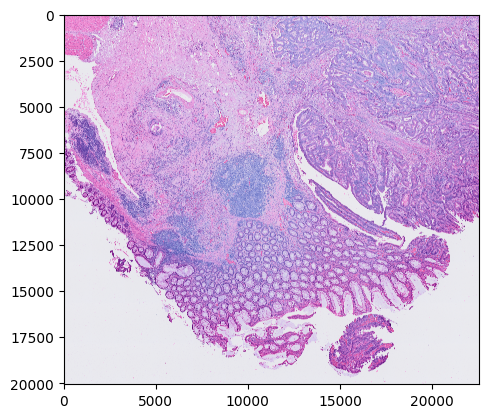

In [16]:
plt.imshow(img_cropped)

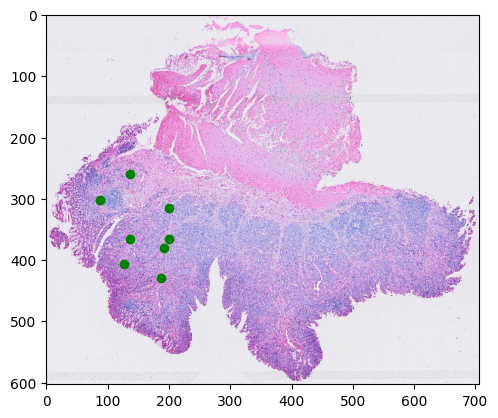

In [36]:
%matplotlib inline

fixedX = [x/100 for x in alignment['fixedX'].tolist()]
fixedY = [x/100 for x in alignment['fixedY'].tolist()]

alignmentX = [x/100 for x in alignment['alignmentX'].tolist()]
alignmentY = [x/100 for x in alignment['alignmentY'].tolist()]

implot = plt.imshow(img[::100, ::100])

#plt.plot(fixedX[0],fixedY[0])
plt.scatter(alignmentX, alignmentY, c='green')
#plt.scatter(fixedX, fixedY, c='red')

plt.show()

In [8]:
import numpy as np
import spatialdata as sd

In [9]:
print(tifffile.__version__)

2024.5.22


In [10]:
import spatialdata_io
spadata = spatialdata_io.xenium('/scratch/leuven/353/vsc35372/Hackathon2024/datasets/colorectal_cancer/Xenium_V1_Human_Colon_Cancer_P1_CRC_Add_on_FFPE_outs/',
                                n_jobs=8,
                                cell_boundaries=True,
                                nucleus_boundaries=True,
                                morphology_focus=True,)
spadata

INFO     reading                                                                                                   
         /scratch/leuven/353/vsc35372/Hackathon2024/datasets/colorectal_cancer/Xenium_V1_Human_Colon_Cancer_P1_CRC_
         Add_on_FFPE_outs/cell_feature_matrix.h5                                                                   


/tmp/ipykernel_3153645/2398195517.py:2: DeprecationWarning: `cell_boundaries` is being deprecated as an argument to `xenium.xenium` in SpatialData version 0.1, switch to `cells_boundaries` instead.
  spadata = spatialdata_io.xenium('/scratch/leuven/353/vsc35372/Hackathon2024/datasets/colorectal_cancer/Xenium_V1_Human_Colon_Cancer_P1_CRC_Add_on_FFPE_outs/',


SpatialData object with:
├── Images
│     └── 'morphology_focus': MultiscaleSpatialImage[cyx] (5, 34111, 31345), (5, 17055, 15672), (5, 8527, 7836), (5, 4263, 3918), (5, 2131, 1959)
├── Labels
│     ├── 'cell_labels': MultiscaleSpatialImage[yx] (34111, 31345), (17055, 15672), (8527, 7836), (4263, 3918), (2131, 1959)
│     └── 'nucleus_labels': MultiscaleSpatialImage[yx] (34111, 31345), (17055, 15672), (8527, 7836), (4263, 3918), (2131, 1959)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 11) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (307762, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (307762, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (299564, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (307762, 422)
with coordinate systems:
▸ 'global', with elements:
        morphology_focus (Images), cell_labels (Labels), nucleus_labels (Labels), transcripts (Points), cell_boundaries (Shapes), cell

In [11]:
#spadata.write('/scratch/leuven/353/vsc35372/Hackathon2024/datasets/colorectal_cancer/Xenium_v1_spatialdata.zarr')

In [12]:
from spatialdata.models import ShapesModel

fixedX = alignment['fixedX'].tolist()
fixedY = alignment['fixedY'].tolist()

alignmentX = alignment['alignmentX'].tolist()
alignmentY = alignment['alignmentY'].tolist()

coord_fixed = []
coord_align = []
for i, e in enumerate(fixedX):
    coord_fixed.append([fixedX[i],fixedY[i]])
    coord_align.append([alignmentX[i], alignmentY[i]])

hne_landmarks = ShapesModel.parse(
    np.array(coord_align), geometry=0, radius=500
)
xenium_landmarks = ShapesModel.parse(
    np.array(coord_fixed), geometry=0, radius=500
)

In [13]:
spadata["xenium_landmarks"] = xenium_landmarks

In [14]:
from spatialdata import SpatialData

hne_spadata = SpatialData()

In [44]:
from spatialdata.models import Image2DModel
hne_spadata['HnE_slide'] = Image2DModel.parse(img, dims = ('y', 'x', 'c'))
hne_spadata

INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           


/data/leuven/353/vsc35372/miniconda3/envs/env/lib/python3.10/site-packages/spatialdata/_core/_elements.py:54: UserWarning: Key `HnE_slide` already exists. Overwriting it.
  self._check_key(key, self.keys(), self._shared_keys)


SpatialData object with:
├── Images
│     └── 'HnE_slide': SpatialImage[cyx] (3, 60222, 70534)
└── Shapes
      └── 'hne_landmarks': GeoDataFrame shape: (8, 2) (2D shapes)
with coordinate systems:
▸ 'aligned', with elements:
        hne_landmarks (Shapes)
▸ 'global', with elements:
        HnE_slide (Images), hne_landmarks (Shapes)

In [45]:
hne_spadata["hne_landmarks"] = hne_landmarks

/data/leuven/353/vsc35372/miniconda3/envs/env/lib/python3.10/site-packages/spatialdata/_core/_elements.py:92: UserWarning: Key `hne_landmarks` already exists. Overwriting it.
  self._check_key(key, self.keys(), self._shared_keys)


In [46]:
from spatialdata.transformations import (
    align_elements_using_landmarks,
    get_transformation_between_landmarks,
)

affine = get_transformation_between_landmarks(
    references_coords=spadata["xenium_landmarks"], moving_coords=hne_spadata["hne_landmarks"] )
affine

Affine (x, y -> x, y)
    [ 6.87397251e-03  1.28895156e+00 -2.56968272e+04]
    [-1.28895156e+00  6.87397251e-03  3.13612818e+04]
    [0. 0. 1.]

In [47]:
spadata

SpatialData object with:
├── Images
│     └── 'morphology_focus': MultiscaleSpatialImage[cyx] (5, 34111, 31345), (5, 17055, 15672), (5, 8527, 7836), (5, 4263, 3918), (5, 2131, 1959)
├── Labels
│     ├── 'cell_labels': MultiscaleSpatialImage[yx] (34111, 31345), (17055, 15672), (8527, 7836), (4263, 3918), (2131, 1959)
│     └── 'nucleus_labels': MultiscaleSpatialImage[yx] (34111, 31345), (17055, 15672), (8527, 7836), (4263, 3918), (2131, 1959)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 11) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (307762, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (307762, 2) (2D shapes)
│     ├── 'nucleus_boundaries': GeoDataFrame shape: (299564, 1) (2D shapes)
│     └── 'xenium_landmarks': GeoDataFrame shape: (8, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (307762, 422)
with coordinate systems:
▸ 'aligned', with elements:
        morphology_focus (Images)
▸ 'global', with elements:
   

In [48]:
affine = align_elements_using_landmarks(
    references_coords=spadata["xenium_landmarks"],
    moving_coords=hne_spadata["hne_landmarks"],
    reference_element=spadata["morphology_focus"],
    moving_element=hne_spadata["HnE_slide"],
    reference_coordinate_system="global",
    moving_coordinate_system="global",
    new_coordinate_system="aligned",
)
affine

Sequence 
    Identity 
    Affine (x, y -> x, y)
        [ 6.87397251e-03  1.28895156e+00 -2.56968272e+04]
        [-1.28895156e+00  6.87397251e-03  3.13612818e+04]
        [0. 0. 1.]

In [49]:
from spatialdata import SpatialData
from spatialdata.transformations import (
    BaseTransformation,
    Sequence,
    get_transformation,
    set_transformation,
)


def postpone_transformation(
    sdata: SpatialData,
    transformation: BaseTransformation,
    source_coordinate_system: str,
    target_coordinate_system: str,
):
    for element_type, element_name, element in sdata._gen_elements():
        old_transformations = get_transformation(element, get_all=True)
        if source_coordinate_system in old_transformations:
            old_transformation = old_transformations[source_coordinate_system]
            sequence = Sequence([old_transformation, transformation])
            set_transformation(element, sequence, target_coordinate_system)


postpone_transformation(
    sdata=hne_spadata,
    transformation=affine,
    source_coordinate_system="global",
    target_coordinate_system="aligned",
)

In [50]:
spadata

SpatialData object with:
├── Images
│     └── 'morphology_focus': MultiscaleSpatialImage[cyx] (5, 34111, 31345), (5, 17055, 15672), (5, 8527, 7836), (5, 4263, 3918), (5, 2131, 1959)
├── Labels
│     ├── 'cell_labels': MultiscaleSpatialImage[yx] (34111, 31345), (17055, 15672), (8527, 7836), (4263, 3918), (2131, 1959)
│     └── 'nucleus_labels': MultiscaleSpatialImage[yx] (34111, 31345), (17055, 15672), (8527, 7836), (4263, 3918), (2131, 1959)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 11) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (307762, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (307762, 2) (2D shapes)
│     ├── 'nucleus_boundaries': GeoDataFrame shape: (299564, 1) (2D shapes)
│     └── 'xenium_landmarks': GeoDataFrame shape: (8, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (307762, 422)
with coordinate systems:
▸ 'aligned', with elements:
        morphology_focus (Images)
▸ 'global', with elements:
   

In [51]:
import spatialdata
spatialdata.get_extent(spadata)

{'y': (0.0, 34111.0),
 'x': (0.0, 31345.0),
 'z': (9.6482572555542, 41.56712341308594)}

In [52]:
spatialdata.get_extent(hne_spadata, coordinate_system = 'aligned')

{'y': (-59553.62729225552, 31775.2461702853),
 'x': (-25696.827156708598, 52411.262259230054)}

In [60]:
hne_spadata

SpatialData object with:
├── Images
│     └── 'HnE_slide': SpatialImage[cyx] (3, 60222, 70534)
└── Shapes
      └── 'hne_landmarks': GeoDataFrame shape: (8, 2) (2D shapes)
with coordinate systems:
▸ 'aligned', with elements:
        HnE_slide (Images), hne_landmarks (Shapes)
▸ 'global', with elements:
        HnE_slide (Images), hne_landmarks (Shapes)

In [66]:
spadata

SpatialData object with:
├── Images
│     └── 'morphology_focus': MultiscaleSpatialImage[cyx] (5, 34111, 31345), (5, 17055, 15672), (5, 8527, 7836), (5, 4263, 3918), (5, 2131, 1959)
├── Labels
│     ├── 'cell_labels': MultiscaleSpatialImage[yx] (34111, 31345), (17055, 15672), (8527, 7836), (4263, 3918), (2131, 1959)
│     └── 'nucleus_labels': MultiscaleSpatialImage[yx] (34111, 31345), (17055, 15672), (8527, 7836), (4263, 3918), (2131, 1959)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 11) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (307762, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (307762, 2) (2D shapes)
│     ├── 'nucleus_boundaries': GeoDataFrame shape: (299564, 1) (2D shapes)
│     └── 'xenium_landmarks': GeoDataFrame shape: (8, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (307762, 422)
with coordinate systems:
▸ 'aligned', with elements:
        morphology_focus (Images)
▸ 'global', with elements:
   

In [61]:
import spatialdata_plot
hne_spadata.pl.render_images('HnE_slide')

SpatialData object with:
├── Images
│     └── 'HnE_slide': SpatialImage[cyx] (3, 60222, 70534)
└── Shapes
      └── 'hne_landmarks': GeoDataFrame shape: (8, 2) (2D shapes)
with coordinate systems:
▸ 'aligned', with elements:
        HnE_slide (Images), hne_landmarks (Shapes)
▸ 'global', with elements:
        HnE_slide (Images), hne_landmarks (Shapes)

In [62]:
hne_spadata['HnE_slide']

<xarray.SpatialImage 'image' (c: 3, y: 60222, x: 70534)>
dask.array<transpose, shape=(3, 60222, 70534), dtype=uint8, chunksize=(3, 6688, 6688), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) int64 0 1 2
  * y        (y) float64 0.5 1.5 2.5 3.5 ... 6.022e+04 6.022e+04 6.022e+04
  * x        (x) float64 0.5 1.5 2.5 3.5 ... 7.053e+04 7.053e+04 7.053e+04
Attributes:
    transform:  {'global': Identity , 'aligned': Sequence \n    Identity \n  ...

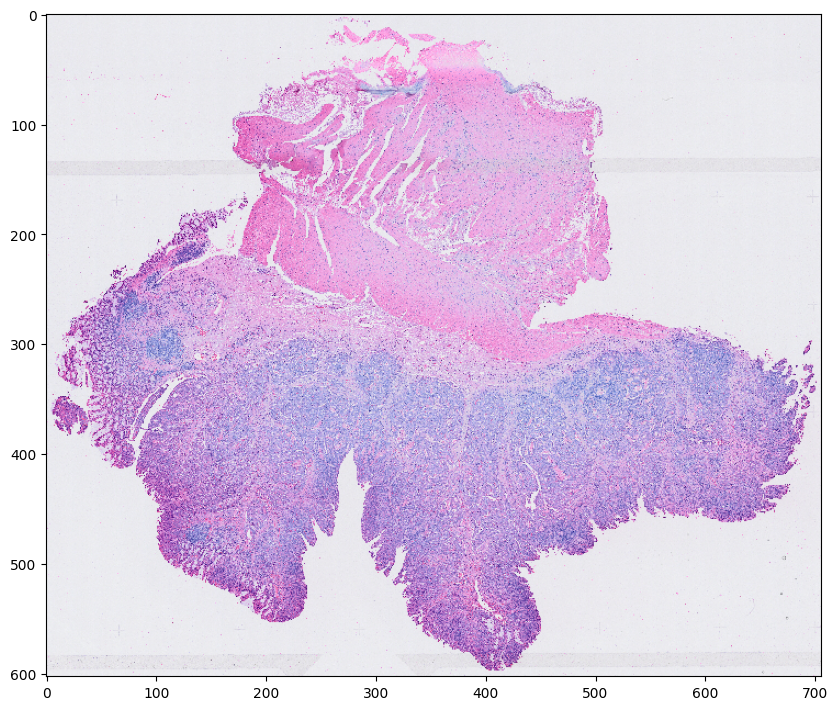

In [43]:
img_data = hne_spadata['HnE_slide']
plt.figure(figsize=(10, 10))
plt.imshow(img_data[::100, ::100])
plt.show()

In [63]:
################ Feqture Extraction ##################

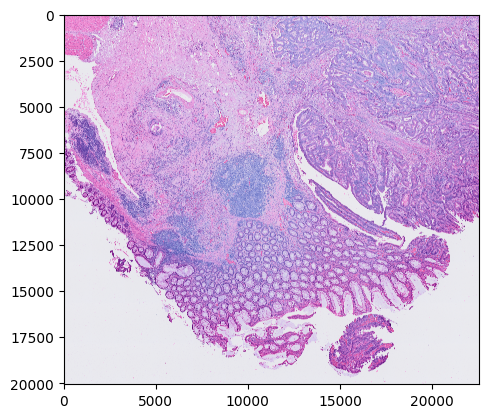

In [23]:
plt.imshow(img_cropped)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

In [2]:
import tifffile
img = tifffile.imread('/scratch/leuven/353/vsc35372/Hackathon2024/datasets/colorectal_cancer/Xenium_V1_Human_Colon_Cancer_P1_CRC_Add_on_FFPE_he_image.ome.tif')

In [3]:
img_cropped = np.rot90(img[20392: 42963, 0: 20059])

In [4]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

In [5]:
from skimage.transform import resize

new_size = (img_cropped.shape[0] // 10, img_cropped.shape[1] // 10)
resized_image = resize(img_cropped, new_size, anti_aliasing=True)

In [6]:
def preprocess_image_ndarray(image_ndarray):
    preprocess = transforms.Compose([
        transforms.ToPILImage(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    
    image = preprocess(image_ndarray)
    image = image.unsqueeze(0)
    return image

In [7]:
torch.cuda.empty_cache()

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

model = models.resnet50(pretrained=True)
model.to(device)
model.eval()

Using device: cuda


/data/leuven/353/vsc35372/miniconda3/envs/env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/leuven/353/vsc35372/miniconda3/envs/env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
! nvidia-smi

Wed Jun 12 15:41:26 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100 80G...  On   | 00000000:17:00.0 Off |                   On |
| N/A   39C    P0    64W / 300W |   3902MiB / 81920MiB |     N/A      Default |
|                               |                      |              Enabled |
+-------------------------------+----------------------+----------------------+

+-----------------------------------------------------------------------------+
| MIG d

In [10]:
image = preprocess_image_ndarray(resized_image).to(device)

In [11]:
model.forward(image)

tensor([[-4.7198e-01,  1.8394e+00, -4.9777e-01, -4.8308e-01,  1.0229e+00,
          2.5733e+00,  2.3435e+00,  9.3493e-02, -7.1312e-01, -1.8872e+00,
         -1.0770e+00, -1.0305e+00, -1.0917e+00, -6.5989e-01, -4.8370e-01,
         -3.8779e-01, -5.9421e-01, -7.8569e-01,  4.8195e-01, -2.7741e-01,
         -1.4993e+00, -1.8042e+00, -1.3995e+00, -1.0590e+00, -5.5479e-01,
         -5.5794e-01,  7.9329e-01,  1.4934e+00,  6.0319e-01, -6.1237e-01,
         -2.6901e-02,  2.4022e-01, -1.3816e-01,  1.7405e+00,  1.7249e+00,
         -6.5383e-03,  1.0662e+00, -2.0535e-01,  2.5837e-01, -6.2913e-01,
          6.9054e-01, -8.6620e-01,  2.2376e-01,  5.0329e-02,  6.7527e-02,
          4.6184e-01,  3.0472e-01, -8.8385e-01, -3.6292e-01,  3.5323e-02,
          3.7250e-01, -2.1727e+00,  1.0006e+00,  3.8859e-01, -6.6538e-01,
          1.4898e-03, -1.1163e+00, -8.8781e-01,  2.0670e+00, -3.6467e-01,
          5.3933e-01, -1.0354e-01, -8.2029e-01, -5.7321e-01, -8.8912e-01,
          3.1876e+00, -2.9327e-01, -2.